# Understanding Variance
Before we start discussing simple and multiple regression, it is worth taking some time to understand what we are trying to achieve at a much higher level. Both *simple* and *multiple* regression are examples of *statistical models*. Although your prior experiences may have left the impression that statistics is about *hypothesis tests*, the reality is that statistics is a science concerned with building *models* of data. This concept of model building is *fundamental* to a much deeper understanding of statistics and is fundamental to your success on the rest of this course. As such, we will spend some time at the beginning of this lesson exploring what we mean by a statistical model before we go any further.

## Defining Variance
The starting point for understanding statistical modelling is understanding the concept of *variance*. Variance is the basic currency of statistics. It is the fundamental information that data holds and is the feature of data that all statistical models aim to capture. Variance is therefore a very important concept and so we need to be clear on what *exactly* variance is.

Informally, the idea of variance is very simple. For a given set of data, we want to understand the reason why the measured values are different from each other. In other words, why does the data *vary*? If data did not vary, it would be constant. Every time we took a measurement we would get the same value. In this scenario, the data would be *perfectly predictable* and there would be no need for statistics.

As an example, consider the plot of all the measurements of `mpg` from the `mtcars` dataset[^foot1] shown below. Clearly, the values of `mpg` differ from car-to-car. This is expected, but take a moment to consider *why* this is the case? 

In [1]:
options(repr.plot.width=14, repr.plot.height=8)

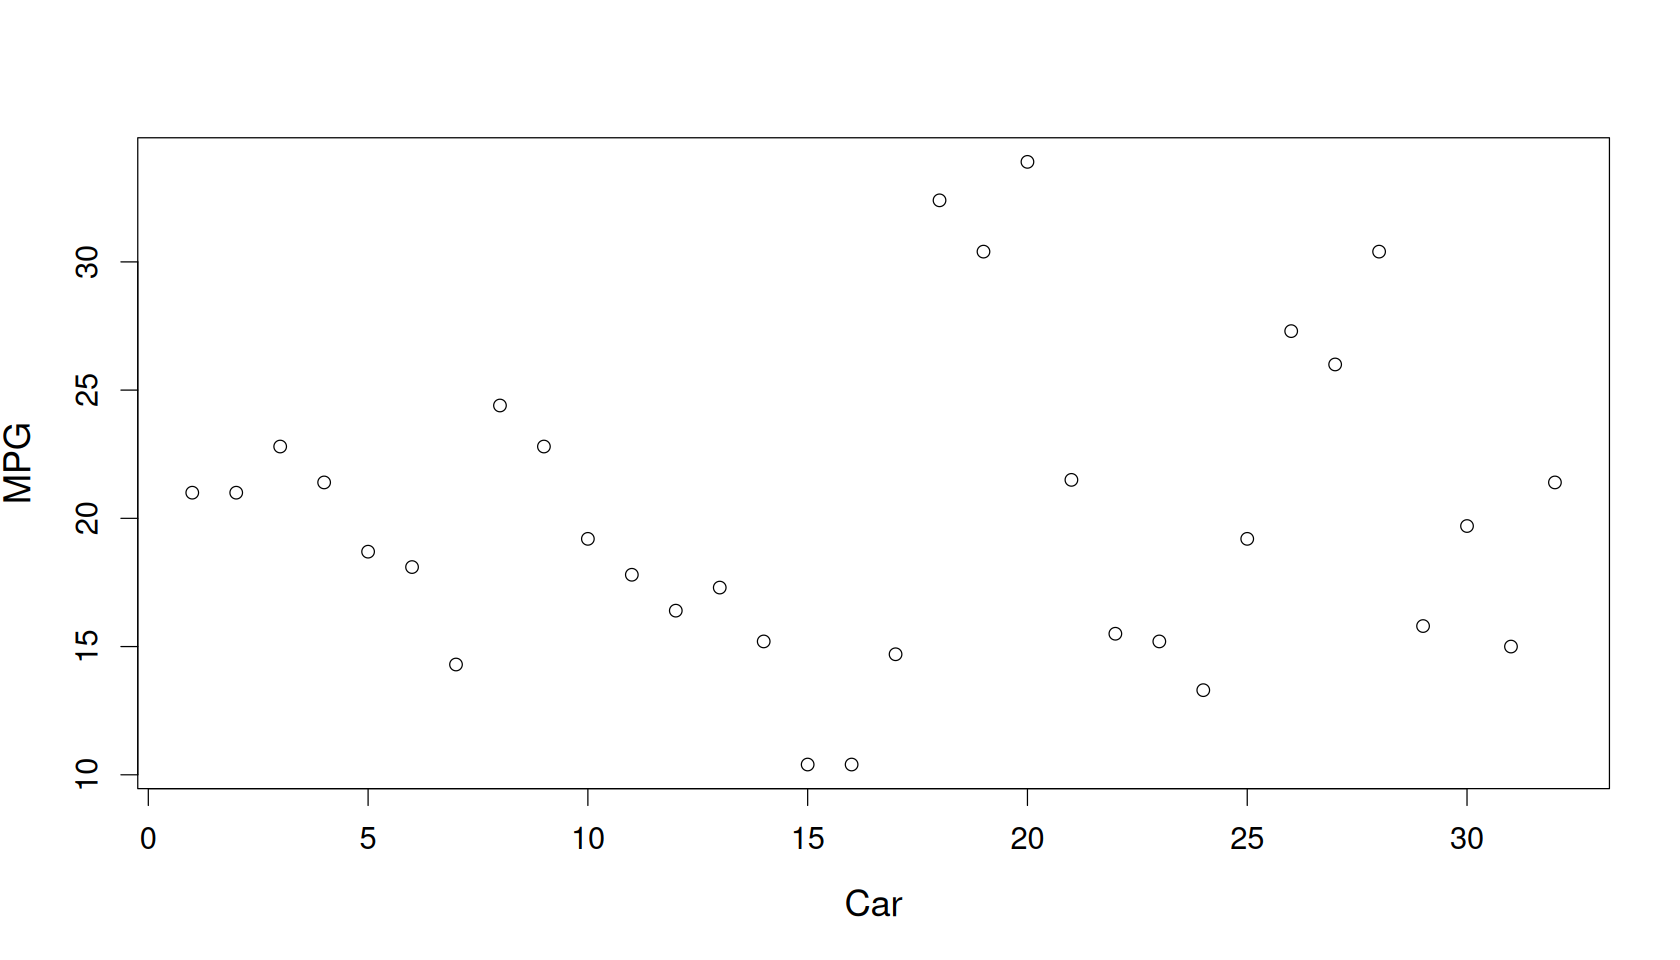

In [2]:
data('mtcars')
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=seq(1,length(mtcars$mpg)), y=mtcars$mpg, xlab="Car", ylab="MPG")

```{admonition} Why do different cars have different MPG values?
:class: tip, dropdown
The most obvious answer here is that cars have different properties, such as their weight or their engine size. However, there will also be a degree of natural variation due to limitations in the precision of measurement. Importantly, some of these sources we can measures, whereas others we cannot. This is an important distinction within statistics and is sometimes known as *reducible* versus *irriducible* error.
```


Considering the different sources of the variation in `mpg` is the first step towards building a statistical model. Indeed, thinking about the problem and considering various possibilities is one of the first things an analyst should do when presented with a new dataset. By doing so, you are starting to build your own mental model of the observed variance. All statistics does is allow this process to be formalised. 


## Measuring Variance
In order to start understanding the variance we can observe, we need some way of *quantifying* it. As mentioned above, our question is really about how far any set of data are from being *constant*. If we consider this to be the definition of *no variance*, then our measure must capture how far away our data are from a constant state. But what constant value should we pick for the comparisons? We could select something arbitrary (e.g. 0, 100, 1000), however (for reasons we will justify further below) the better choice is to use *the mean*.

To see this visually, the mean value of `mpg` is indicated as a horizontal line in the plot below. This provides our *yardstick* to measure variation against. 

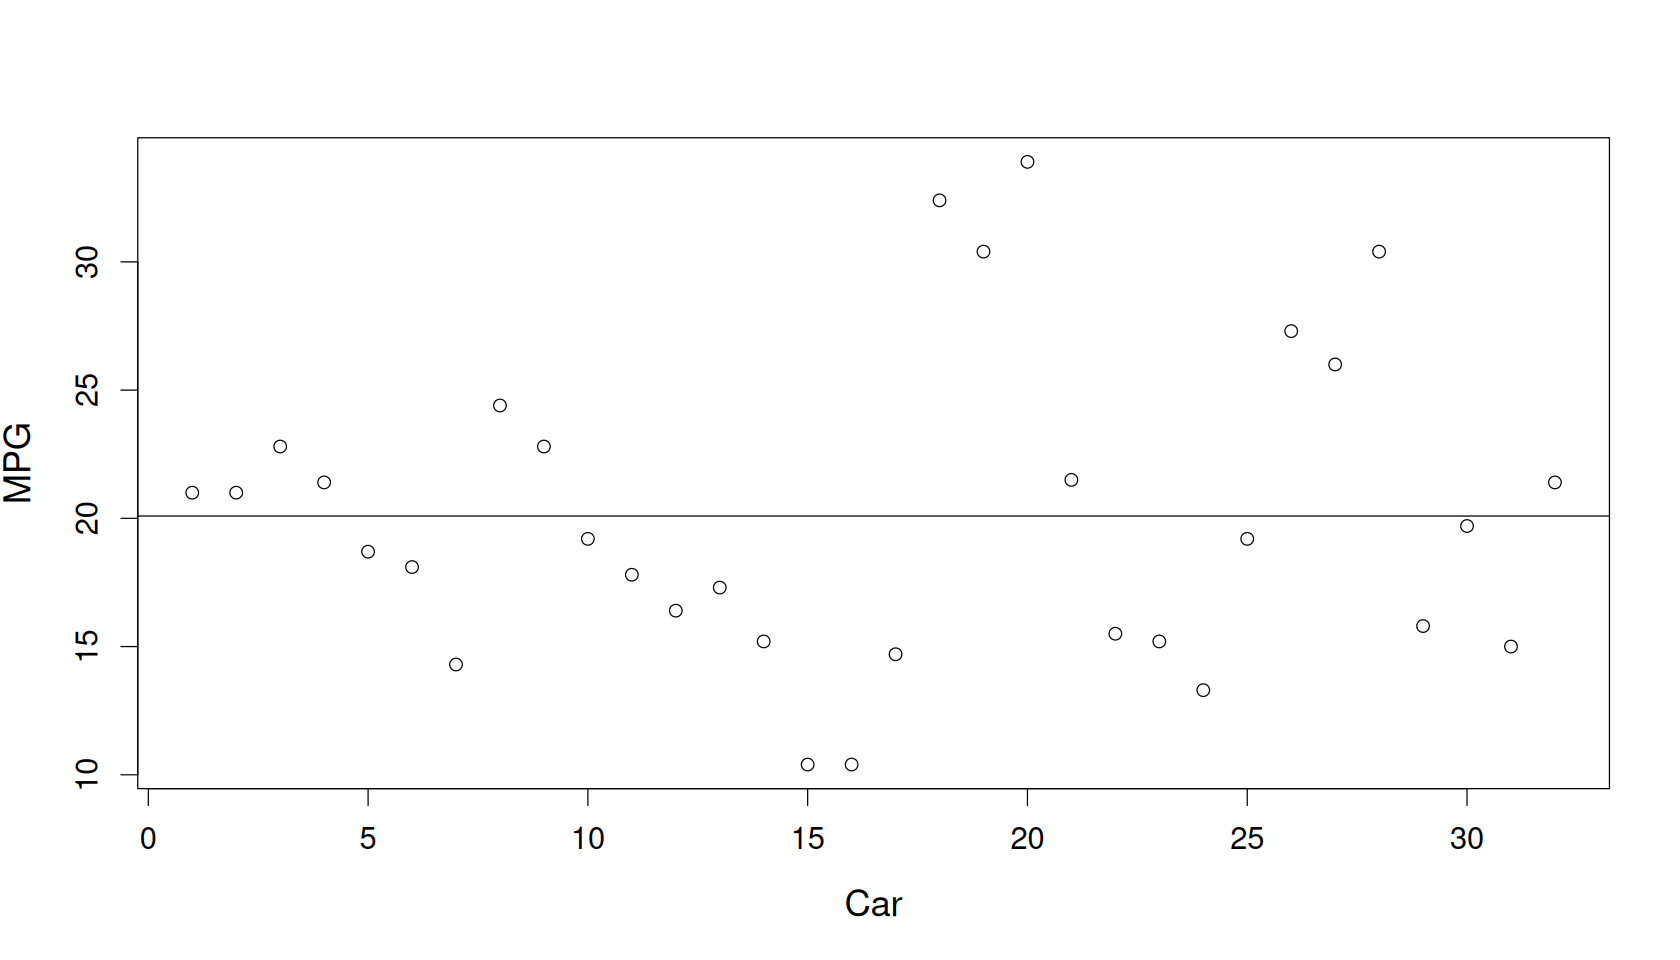

In [3]:
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=seq(1,length(mtcars$mpg)), y=mtcars$mpg, xlab="Car", ylab="MPG")
abline(h=mean(mtcars$mpg))

The vertical distances from the mean to each data point therefore tells us how much variation there is to explain. These are shown on the plot below. 

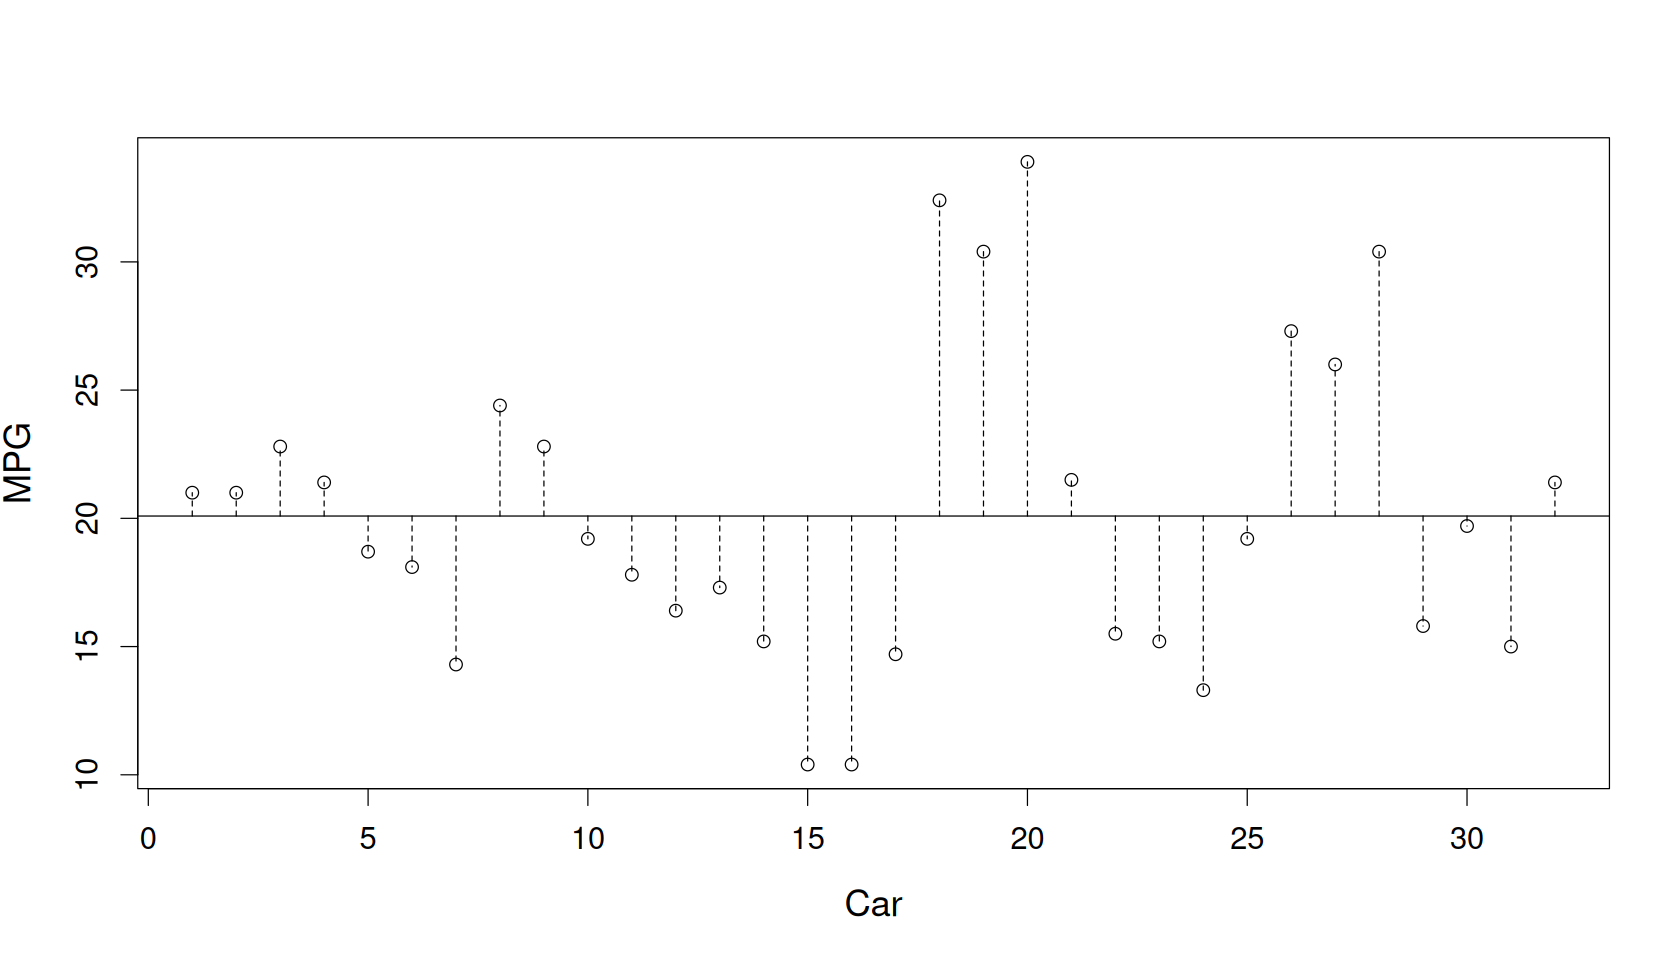

In [4]:
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=1:length(mtcars$mpg), y=mtcars$mpg, xlab="Car", ylab="MPG")
abline(h=mean(mtcars$mpg))
for (i in 1:length(mtcars$mpg)){
    x.start <- i
    x.end   <- i
    y.start <- mean(mtcars$mpg)
    y.end   <- mtcars$mpg[i]
    lines(x=c(x.start,x.end), y=c(y.start,y.end), lty=2)
}

For instance, datapoint 1 sits *above* the mean and datapoint 7 sits *below* the mean. Their vertical distances are therefore

In [5]:
mtcars$mpg[1] - mean(mtcars$mpg)
mtcars$mpg[7] - mean(mtcars$mpg)

[1] 0.909375

[1] -5.790625

In order to get an *overall* sense of the variation across all the cars, we might first think to *sum* these distances. However, if we do that then we get a result that is essentially 0

In [6]:
sum(mtcars$mpg - mean(mtcars$mpg))

[1] 1.421085e-14

The problem is that the mean is, by definition, *perfectly* in the middle of all the data and thus all the positve and negative distances will cancel and we will be left with nothing. Instead, we *square* the values[^foot2] before summing them

In [7]:
sum((mtcars$mpg - mean(mtcars$mpg))^2)

[1] 1126.047

This provides some indication of the variation in this data set, as it would be 0 if the data were constant. However, it is confounded by the fact that it is sensitive to the number of data points. For instance, we could get the same value from a data set with many data points near to the mean and a data set with a small number data points spread out from the mean. Our visual sense of variance does not depend on the amount of data, rather, it depends upon how far the data are from the mean *in general*. As such, the final step is to divide by the number of data points[^df-foot] to produce an *average* squared distance from the mean.

In [8]:
sum((mtcars$mpg - mean(mtcars$mpg))^2) / length(mtcars$mpg)

[1] 35.18897

From this, we can conclude that the average squared distance from the mean is $35.19$. This is the total amount of *variance* within these data and thus indicates the value that we want to explain. Very generally, the aim of a statistical model is to break this value up into independent chunks that can be attributed to different sources. The magnitude of these chunks relative to the amount that we *cannot* explain gives us an indication of how *meaningful* or *important* these sources are, as well as indicating how well the statistical model is able to predict future values. 

## Interpreting Variance
One of the disadvantages of the definition of variance given above is that it is expressed in squared-units of the variable in question, which can be hard to interpret. As such, when interpretation matters, it is more usual to use $\sigma$ rather than $\sigma^{2}$, by taking the square-root of the variance. This produces a value in the original units of the variable and can be interpreted as the average deviation from the mean. This should be familiar to you as the *standard deviation*. For example, $\sqrt{35.19} = 5.93$. So, the average amount that cars deviate from the mean is 5.93 MPG. Note that this is mainly useful for *interpretation*, but scaling the variance in this fashion is not always needed. For instance, if we are taking ratios of variance, whether we do so in the original units or in scaled units will make no difference. 

### Standardising Distances
Sometimes it is useful to express distances in units of standard deviation, because this makes the description unit-less and thus applicable to lots of different types of data. For instance, we saw above that datapoint 7 was 5.79 MPG below the mean. The standard deviation for this dataset, based on the variance calculated above, is $\sigma = \sqrt{35.19} = 5.93$. If we divide these values, we can express datapoint 7's discrepancy in terms of standard deviations, giving $\frac{-5.79}{5.93} = -0.98$. As such, we can say that datapoint 7 lies 0.98 standard deviations below the mean, irrespective of the original units of the data. You may recognise this as the process used to create *test statistics*, which is something we will return to later in this lesson.


`````{topic} Section Summary
In this section, we have explored the important concept of *variance*, which is key to understanding the general sim of statistical models. ...
`````

[^foot1]: The `mtcars` dataset is included with `R` and contains various measurements from a sample of cars. You can read more about it by typing `?mtcars` at the prompt.

[^foot2]: You might think that taking the *absolute value* of the data before summing would make more sense. This is a metric known as the *mean absolute deviation* (MAD), which is a perfectly legitimate way of measuring the *spread* of data around a central point. However, using squared values has some useful properties. Firstly, it *emphasises* larger distances in the sum, which emphasises the importance of bigger discrepancies from the mean. From a mathematical perspective, squares are also easier to work with and manipulate compared to something like the absolute value.

[^df-foot]: You may know that it is more typical to divide by $n-1$ rather than $n$. When working with an *estimate* of the mean, using $n-1$ leads to an *unbiased* estimate of the variance. However, this is a somewhat ancilliary point that is not all that important for understanding the nature of variance.